In [1]:
import torch

x_train=torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train=torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])


In [2]:
# mse = torch.nn.MSELoss()

# bce = torch.nn.BCELoss()

w = torch.randn(1,1)
b = torch.randn(1,1)

lr = 1.0
for epoch in range(2001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(x_train @ w + b)
  # h = 1 / (1+math.e**(-(x_train @ w+b)))
  cost = torch.mean(-y_train * torch.log(h) -(1-y_train)*torch.log(1-h))
  # cost = bce(h,y_train)

  cost.backward()
  with torch.no_grad():
    w = w - lr * w.grad
    b = b - lr * b.grad
    if epoch % 100 == 0:
      print(epoch, cost.item(), w.item(), b.item())

  # y == 1 --> -log(h)
  # y == 0 --> -log(1-h)

0 0.9354396462440491 -0.3931236267089844 -0.4527919888496399
100 0.4214383661746979 -1.4325512647628784 4.349246501922607
200 0.39908576011657715 -1.888038158416748 5.742158889770508
300 0.3909820318222046 -2.167356491088867 6.588508605957031
400 0.3870932161808014 -2.3622756004333496 7.17638635635376
500 0.38497257232666016 -2.50679612159729 7.611025810241699
600 0.38372790813446045 -2.617797374725342 7.944221019744873
700 0.38296183943748474 -2.7050328254699707 8.205720901489258
800 0.3824746310710907 -2.774695873260498 8.41433334350586
900 0.38215717673301697 -2.830979108810425 8.582749366760254
1000 0.3819465637207031 -2.8768506050109863 8.719926834106445
1100 0.3818049728870392 -2.9144911766052246 8.832435607910156
1200 0.38170865178108215 -2.945542573928833 8.925213813781738
1300 0.38164272904396057 -2.9712655544281006 9.00204849243164
1400 0.3815971314907074 -2.9926469326019287 9.065897941589355
1500 0.3815654516220093 -3.010472059249878 9.11911678314209
1600 0.38154342770576477

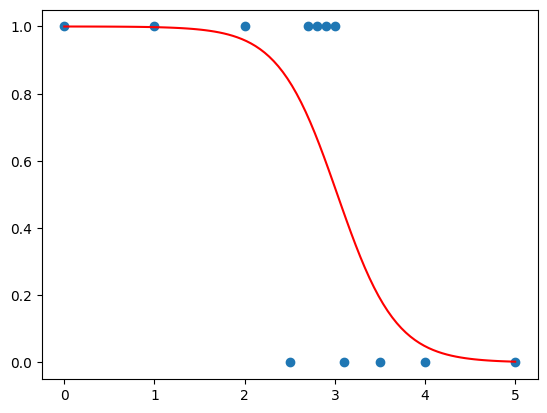

In [3]:
import matplotlib.pyplot as plt

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(X @ w+b)
plt.scatter(x_train, y_train)
plt.plot(X,Y,c="red")
plt.show()

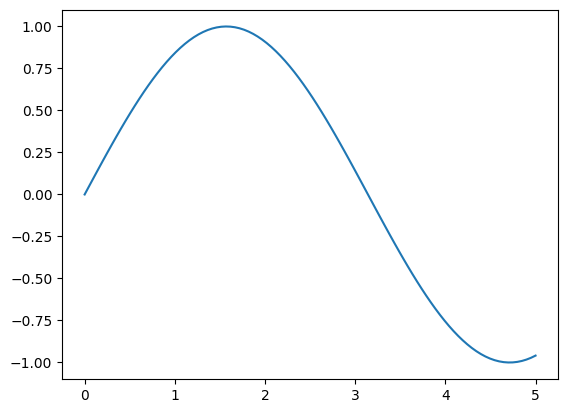

In [4]:
import math
X = [x.item() for x in torch.linspace(0,5,100)]

Y = [math.sin(x) for x in X]

plt.plot(X,Y)




In [5]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]

model = LogisticRegression(penalty = 'none')
model.fit(x_train, y_train)
print(model.coef_, model.intercept_)

x_test = [[4.5],[1.1]]
test_result = model.predict(x_test)
print(test_result)

[[-3.10385806]] [9.39776831]
[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
